# Prosper Loan Data Exploration
## by Dhanya Sreekumar

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.dvipnghack" on line 127 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_a

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('/home/dhanya/Downloads/prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> The income range of the borrower.

> The prosper score of the borrower.

> The current status of the loan.

> The interest rate of the loan.

> The state of the borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> IncomeRange

> ProsperScore

> LoanStatus

> BorrowerRate

> BorrowerState

## Univariate Exploration

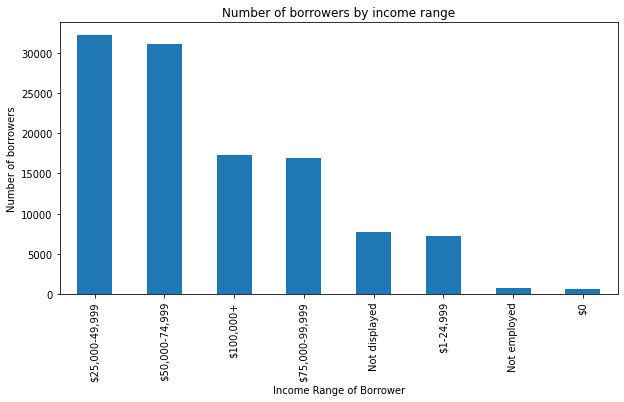

In [3]:
# What is the distribution of borrower income ranges?
income_count = df.IncomeRange.value_counts()
plt.figure(figsize = (10,5))
income_count.plot(kind= 'bar')
plt.xlabel('Income Range of Borrower')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers by income range')
plt.show()

* It is better to remove the 'Not displayed' column. Also, Not Employed and 0 are the same. It will look better if income range was arranged in numerical order.

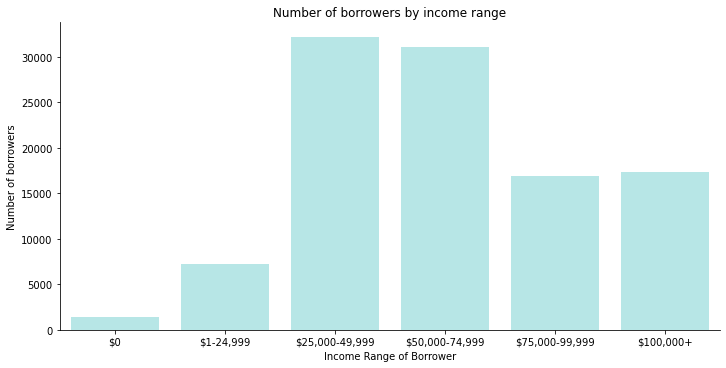

In [4]:
df.IncomeRange = df.IncomeRange.replace('Not employed', '$0')
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.catplot(data = df[df.IncomeRange != 'Not displayed'], x = 'IncomeRange', kind = 'count', height = 5, aspect = 10/5, color = 'paleturquoise', order = order)
plt.xlabel('Income Range of Borrower')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers by income range')
plt.show()

* We see that the highest number of borrowers are from the income range 25000-49999. 

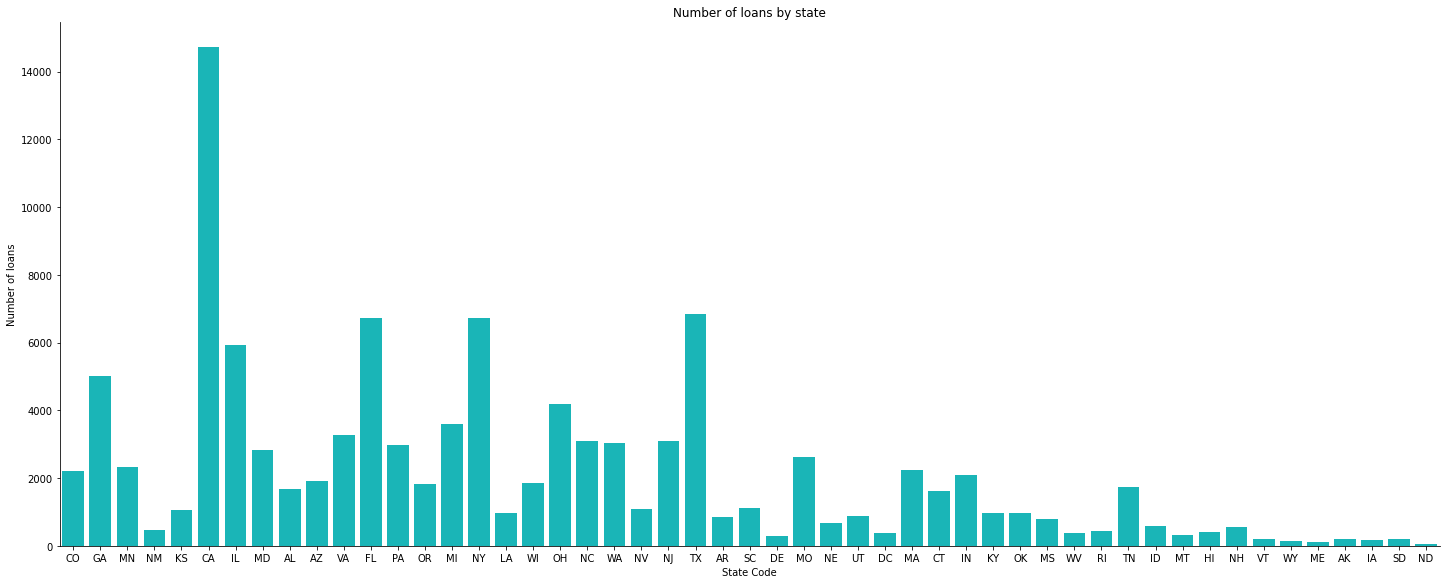

In [5]:
# Let's look at loans of various states.
sb.catplot(data = df[df.LoanStatus != 'Cancelled'], x = 'BorrowerState', kind = 'count', height = 8, aspect = 20/8, color = 'darkturquoise')
plt.xlabel('State Code')
plt.ylabel('Number of loans')
plt.title('Number of loans by state')
plt.show()

* The number is high for the states of California, Texas, New York, Florida, which are also the most populated states in the US.

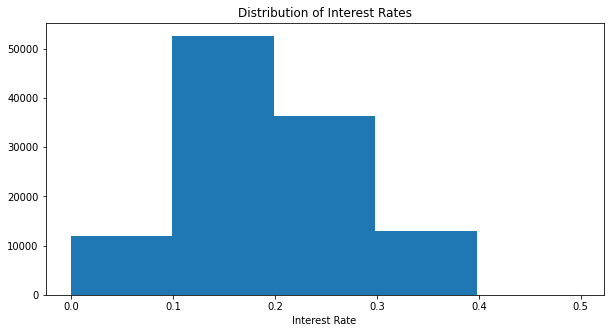

In [6]:
#Let's look at the distribution of interest rates.
plt.figure(figsize = (10,5))
df.BorrowerRate.hist(grid = False, bins = 5)
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rates')
plt.show()

* The interest rate seems to follow a Normal Distribution. The highest frequency is around 0.15

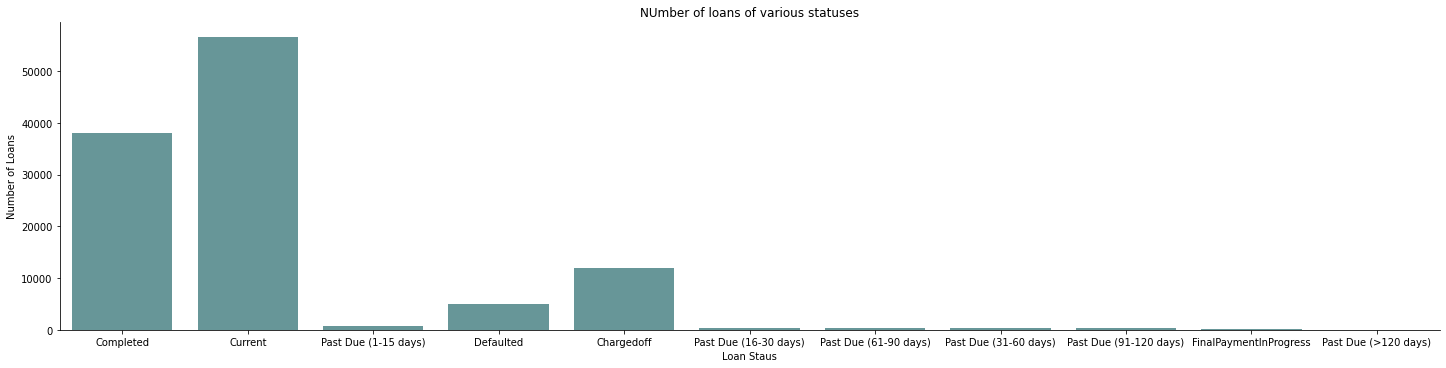

In [7]:
# Loan by status
sb.catplot(data = df[df.LoanStatus != 'Cancelled'], x = 'LoanStatus', kind = 'count', height = 5, aspect = 20/5, color = 'cadetblue')
plt.xlabel('Loan Staus')
plt.ylabel('Number of Loans')
plt.title('NUmber of loans of various statuses')
plt.show()

* We can see that most loans ar on the 'Current' and 'Completed' status.

> The Borrower Interest rate follows a normal distribution.

> In the IncomeRange column, the 0 and Not employed values were combined, since the essentially mean the same. Also removed Not displayed values.

## Bivariate Exploration

### Income Range vs Borrower Rate

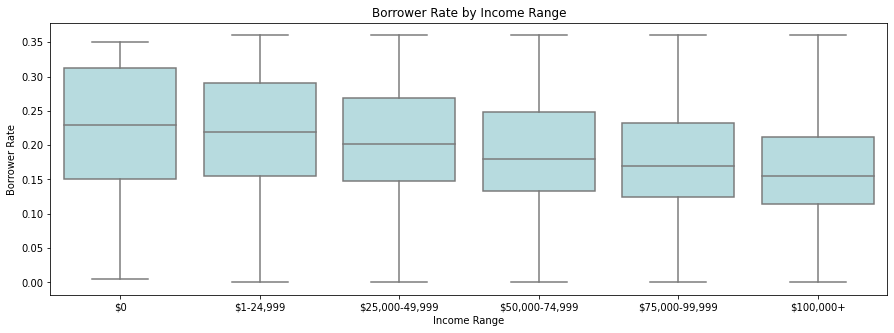

In [8]:
df.IncomeRange = df.IncomeRange[df.IncomeRange != 'Not displayed']
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
plt.figure(figsize = (15,5))
sb.boxplot(data=df, x='IncomeRange', y='BorrowerRate', order = order, color = 'powderblue')
plt.xlabel('Income Range')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate by Income Range')
plt.show()

* We can see that lower income ranges have a higher borrower rate and vice versa.

### Loan Status vs Prosper Score

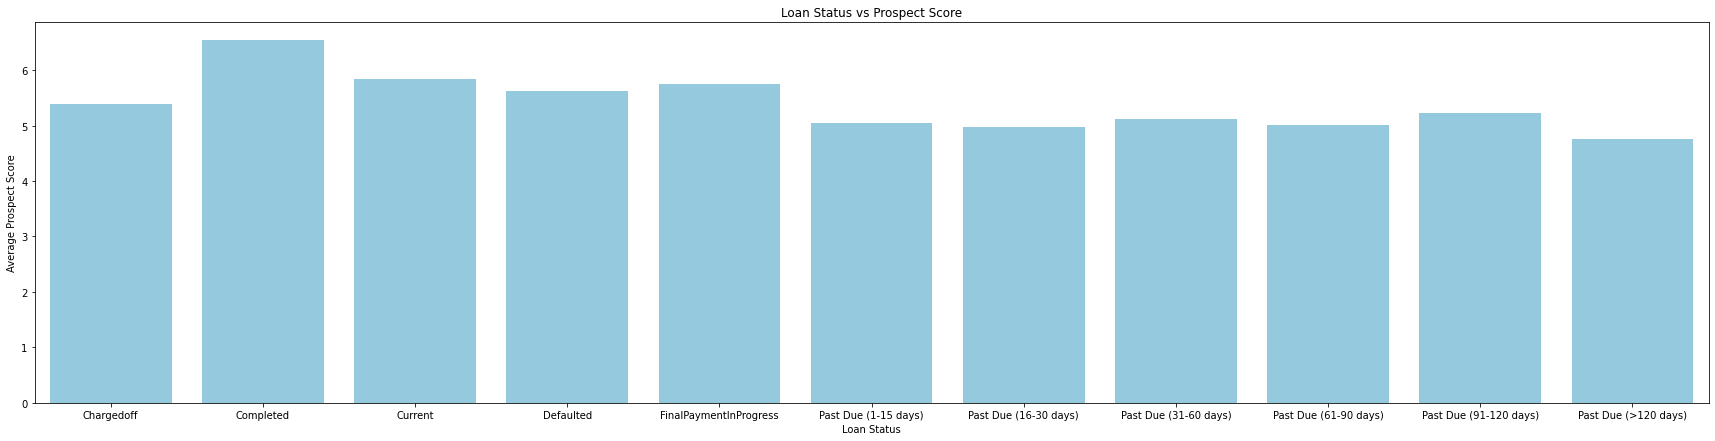

In [9]:
df_Status = df[df.LoanStatus != 'Cancelled'].groupby('LoanStatus')['ProsperScore'].mean()
plt.figure(figsize = (30, 7))
sb.barplot(x = df_Status.index, y = df_Status, color = 'skyblue')
plt.xlabel('Loan Status')
plt.ylabel('Average Prospect Score')
plt.title('Loan Status vs Prospect Score')
plt.show()

* We can see that borrowers who completed their loans have a higher credit score.

### Prosper Score and Borrower Rate

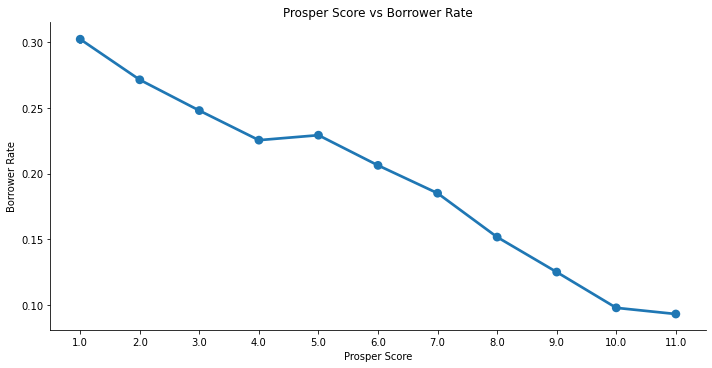

In [10]:
sb.catplot(data =df, x = 'ProsperScore', y = 'BorrowerRate', kind = 'point', height = 5, aspect = 10/5)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.title('Prosper Score vs Borrower Rate')
plt.show()

* Interestingly, we can see that, smaller the proosper score, higher the borrower rate and vice versa.

## Multivariate Exploration

### Borrower Rate by Loan Status for different income groups

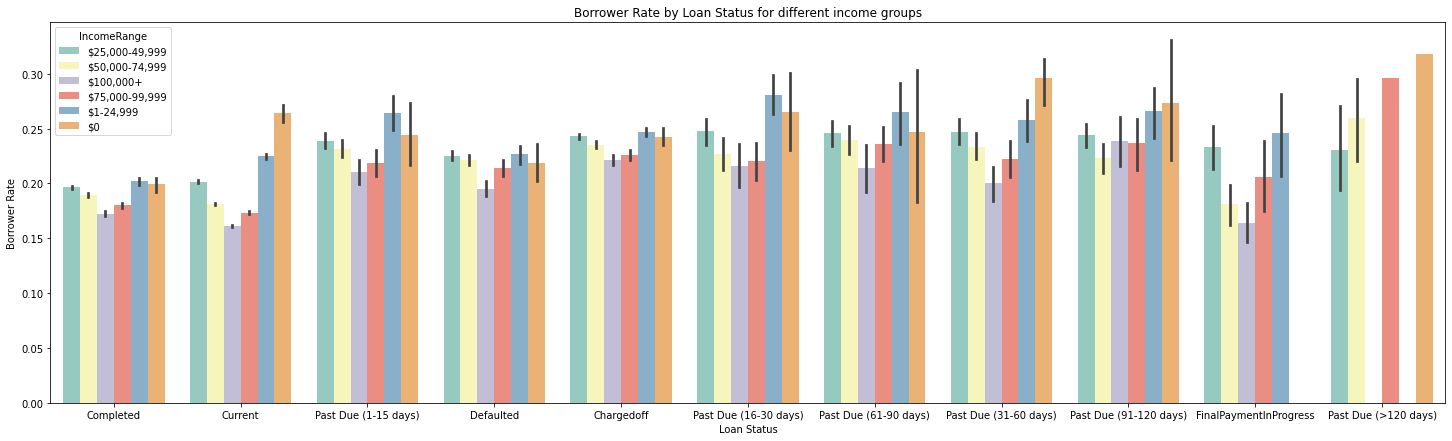

In [11]:
df['LoanStatus'] = df.LoanStatus[df.LoanStatus != 'Cancelled']
plt.figure(figsize = (25,7))
sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange', palette = 'Set3')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate by Loan Status for different income groups')
plt.show()

* An important insight we get from this graph is that the interest rate generally increases as more days past the due date for loan payment. We also see that the lower income groups are the ones who pay the highest interest rate. This can be because that since lower income groups are the most likely to delay payment hence the loan passes due date, the have to pay higher interest rates.